https://www.codementor.io/@dankhan/web-scrapping-using-python-and-beautifulsoup-o3hxadit4

https://pythonprogramming.net/tables-xml-scraping-parsing-beautiful-soup-tutorial/

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [2]:
#!pip install requests
#!pip install beautifulsoup4

In [8]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

In [350]:
# covid cases in south korea from jan to last 15 days
url = "https://en.wikipedia.org/w/index.php?title=2020_coronavirus_pandemic_in_South_Korea&oldid=951626301"
url = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States'
page = requests.get(url)
page.status_code

200

In [351]:
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

<tr class="mw-collapsible" id="mw-customcollapsible-may-l15">
    
<td colspan="2" style="text-align:center" class="bb-04em">2020-05-20</td>

<td class="bb-lr">
  <div title="264" style="background:#A50026;width:6.3px" class="bb-fl">&#8203;</div>
  <div title="10135" style="background:SkyBlue;width:241.96px" class="bb-fl">&#8203;</div>
  <div title="723" style="background:Tomato;width:17.26px" class="bb-fl">&#8203;</div>
</td>

<td style="text-align:center" class="bb-04em"><span class="cbs-ibr" style="padding:0 0.3em 0 0; width:3.5em">11,122</span><span class="cbs-ibl" style="width:4.55em">(+0.11%)</span></td>
    
<td style="text-align:center" class="bb-04em"><span class="cbs-ibr" style="padding:0 0.3em 0 0; width:2.45em">264</span><span class="cbs-ibl" style="width:4.55em">(+0.38%)</span></td>

</tr>

In [399]:
dates = []
cases = []
percent_inc = []

td = soup.findAll('td', class_='bb-04em')

for d in td:
    for c in d.children:
        if 'colspan' in d.attrs:
            s = str(c)
            s = s.replace('⋮', '')
            dates.append(s)
        elif 'span' == c.name :
            cls = c.attrs['class']
            if cls[0] == 'cbs-ibr':
                cases.append(c.text.replace(',', ''))
            elif cls[0] == 'cbs-ibl':
                percent_inc.append(c.text)
                

data_tuple = []
for a in zip(*[iter(cases)]*2): 
   data_tuple.append(a)
    
df = pd.DataFrame(data_tuple, columns=['cases', 'deaths'])

data_tuple = []
for a in zip(*[iter(percent_inc)]*2): 
   data_tuple.append(a)
df2 = pd.DataFrame(data_tuple, columns=['cases_inc', 'deaths_inc'])


df3 =  pd.concat([df, df2], axis=1)
df3['date'] = dates

df3['cases'] = pd.to_numeric(df3['cases'])
df3['deaths'] = pd.to_numeric(df3['deaths'])
df3['date']= pd.to_datetime(df3['date'])
#df3['date'] = df3['date'].dt.date


df3


,cases,deaths,cases_inc,deaths_inc,date
0,1,NaN,(n.a.),,2020-01-21
1,1,NaN,(=),,NaT
2,2,NaN,(+100%),,2020-01-24
3,3,NaN,(+50%),,2020-01-25
4,5,NaN,(+67%),,2020-01-26
...,...,...,...,...,...
101,1517926,85656.0,(+1.3%),(+1.7%),2020-05-19
102,1540294,87184.0,(+1.5%),(+1.8%),2020-05-20
103,1565311,88470.0,(+1.6%),(+1.5%),2020-05-21
104,1589223,89732.0,(+1.5%),(+1.4%),2020-05-22


In [400]:
df3.head()


,cases,deaths,cases_inc,deaths_inc,date
0,1,NaN,(n.a.),,2020-01-21
1,1,NaN,(=),,NaT
2,2,NaN,(+100%),,2020-01-24
3,3,NaN,(+50%),,2020-01-25
4,5,NaN,(+67%),,2020-01-26


In [401]:
# colums with null date  (index: 1, 6, 20)
df3[df3.date.isnull()]

df3['date'][1] = df3['date'][0]
df3['date'][6] = df3['date'][5]
df3['date'][20] = df3['date'][19]

df3.index = df3['date']


/Users/evanuribe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/evanuribe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/evanuribe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [402]:
df3.info()

df3[df3.date.isnull()]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2020-01-21 to 2020-05-23
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cases       106 non-null    int64         
 1   deaths      85 non-null     float64       
 2   cases_inc   106 non-null    object        
 3   deaths_inc  106 non-null    object        
 4   date        100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.0+ KB


,cases,deaths,cases_inc,deaths_inc,date
date,,,,,
NaT,5,NaN,(=),,NaT
NaT,6,NaN,(+20%),,NaT
NaT,11,NaN,(=),,NaT
NaT,12,NaN,(=),,NaT
NaT,12,NaN,(=),,NaT
NaT,14,NaN,(=),,NaT


In [404]:
# may stats
mask = (df3['date'] >= '2020-05-01') 
may = df3 = df3.loc[mask]
may.head(10)


,cases,deaths,cases_inc,deaths_inc,date
date,,,,,
2020-05-01,1095682,58931.0,(+3.1%),(+3.1%),2020-05-01
2020-05-02,1126250,60599.0,(+2.8%),(+2.8%),2020-05-02
2020-05-03,1151643,61716.0,(+2.3%),(+1.8%),2020-05-03
2020-05-04,1172921,62593.0,(+1.8%),(+1.4%),2020-05-04
2020-05-05,1195173,65028.0,(+1.9%),(+3.9%),2020-05-05
2020-05-06,1220032,67729.0,(+2.1%),(+4.2%),2020-05-06
2020-05-07,1247567,69700.0,(+2.3%),(+2.9%),2020-05-07
2020-05-08,1274681,71395.0,(+2.2%),(+2.4%),2020-05-08
2020-05-09,1300244,72950.0,(+2%),(+2.2%),2020-05-09


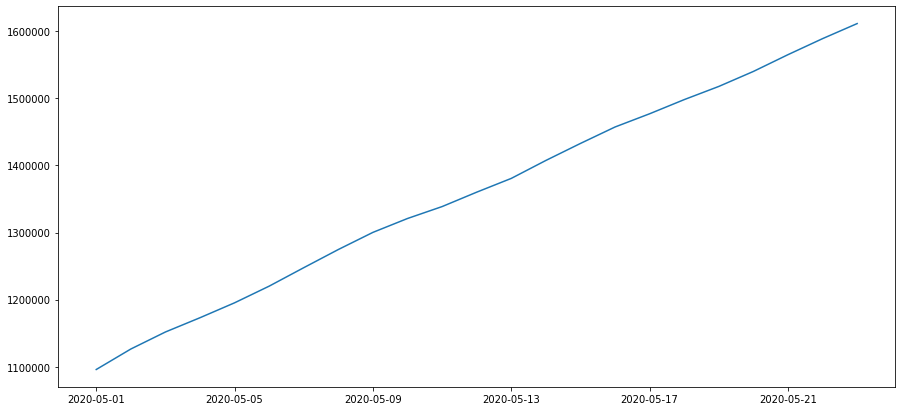

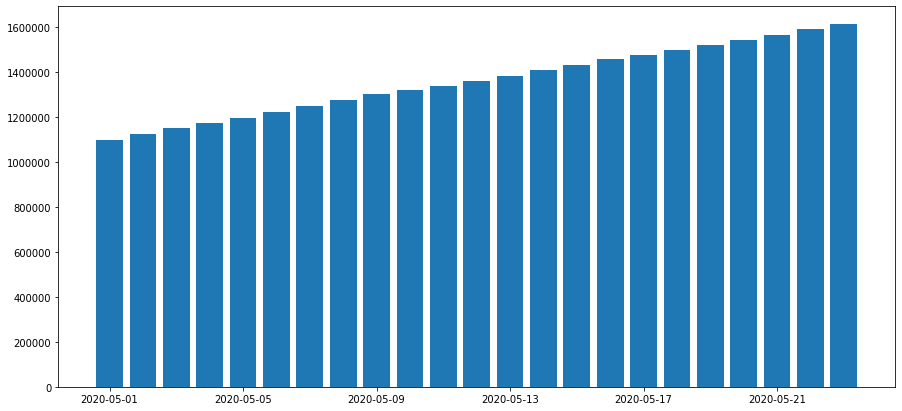

In [405]:

import matplotlib.pyplot as plt
import numpy as np

x = may['date']
y = may['cases']

plt.figure(figsize=(15,7))
plt.plot(x, y)
plt.show()


plt.figure(figsize=(15,7))
plt.bar(x, y)
plt.show()


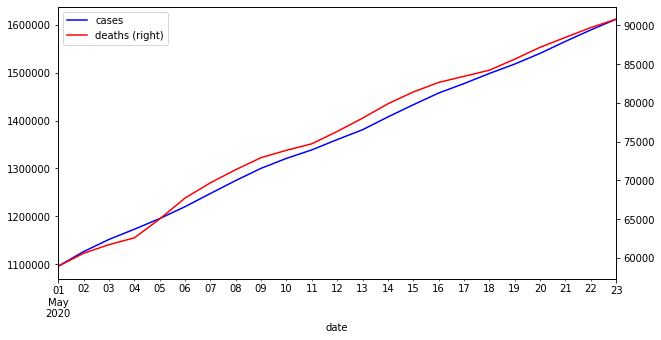

In [409]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(1,1, figsize=(10,5)) 

# Plot the first x and y axes:
df3.plot(x = 'date', y = 'cases', ax = ax, c='b') 

# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df3.plot(x = 'date', y = 'deaths', ax = ax, secondary_y = True, c='r') ;

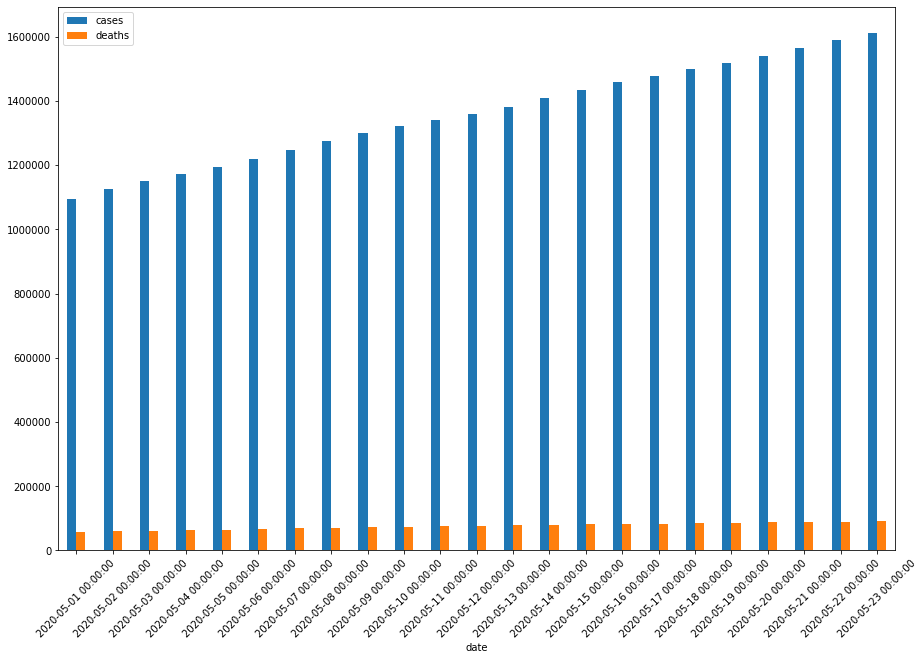

In [407]:
import matplotlib.dates as mdates

may2=may.iloc[:, 0:2]
may2

ax = may2.plot.bar(figsize=(15,10))
ax.fmt_xdata = mdates.DateFormatter('%Y-%-m-%-d')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

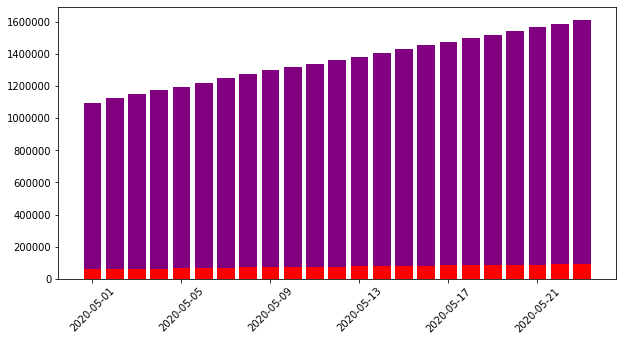

In [408]:
# Create figure and plot space
fig, ax = plt.subplots(1,1, figsize=(10, 5))

x = may['date']
y = may['cases']
y2 = may['deaths']

# Add x-axis and y-axis
ax.bar(may2.index.values, y, color='purple')
ax.bar(may2.index.values, y2, color='red')


# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [22]:
# get dates
dates = []
for x in soup.findAll("td", class_='bb-04em'):
    if "colspan" in x.attrs:
        #x.attrs = {}
        dates.append(x.text)
len(dates)

datesDf = pd.DataFrame(dates, columns=['date'])
#datesDf

# last 15 days number of cases and deaths, first item is cases, 2nd is deaths

spans = soup.find_all('span', {'class' : 'cbs-ibr'})

cases_deaths = [span.get_text() for span in spans]
print(len(cases_deaths))


# percentage increase
spans = soup.find_all('span', {'class' : 'cbs-ibl'})

percent_increase = [span.get_text() for span in spans]
len(percent_increase)

236


236

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States"
page = requests.get(url)
print(page.status_code)   # This should print 200

200


In [8]:
#print(page.content)

In [12]:
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [9]:
##we know that our table is in tag table and class wikitable. So, first we will extract the
#data in table tag using find method of bs4 object. This method returns a bs4 object
tb = soup.find('table', class_='wikitable')
for link in tb.find_all('b'):
    name = link.find('a')
    #print(name)  

<a href="/wiki/George_Washington" title="George Washington">George Washington</a>
<a href="/wiki/John_Adams" title="John Adams">John Adams</a>
<a href="/wiki/Thomas_Jefferson" title="Thomas Jefferson">Thomas Jefferson</a>
<a href="/wiki/James_Madison" title="James Madison">James Madison</a>
<a href="/wiki/James_Monroe" title="James Monroe">James Monroe</a>
<a href="/wiki/John_Quincy_Adams" title="John Quincy Adams">John Quincy Adams</a>
<a href="/wiki/Andrew_Jackson" title="Andrew Jackson">Andrew Jackson</a>
<a href="/wiki/Martin_Van_Buren" title="Martin Van Buren">Martin Van Buren</a>
<a href="/wiki/William_Henry_Harrison" title="William Henry Harrison">William Henry Harrison</a>
<a href="/wiki/John_Tyler" title="John Tyler">John Tyler</a>
<a href="/wiki/James_K._Polk" title="James K. Polk">James K. Polk</a>
<a href="/wiki/Zachary_Taylor" title="Zachary Taylor">Zachary Taylor</a>
<a href="/wiki/Millard_Fillmore" title="Millard Fillmore">Millard Fillmore</a>
<a href="/wiki/Franklin_Pie

In [11]:
# The eleemnt title can be extracted from all a tags using the method get_text().
#So modifyng the above code snippet
for link in tb.find_all('b'):
    name = link.find('a')
    if name != None:
       print(name.get_text('title'))

George Washington
John Adams
Thomas Jefferson
James Madison
James Monroe
John Quincy Adams
Andrew Jackson
Martin Van Buren
William Henry Harrison
John Tyler
James K. Polk
Zachary Taylor
Millard Fillmore
Franklin Pierce
James Buchanan
Abraham Lincoln
Andrew Johnson
Ulysses S. Grant
Rutherford B. Hayes
James A. Garfield
Chester A. Arthur
Grover Cleveland
Benjamin Harrison
Grover Cleveland
William McKinley
Theodore Roosevelt
William Howard Taft
Woodrow Wilson
Warren G. Harding
Calvin Coolidge
Herbert Hoover
Franklin D. Roosevelt
Harry S. Truman
Dwight D. Eisenhower
John F. Kennedy
Lyndon B. Johnson
Richard Nixon
Gerald Ford
Jimmy Carter
Ronald Reagan
George H. W. Bush
Bill Clinton
George W. Bush
Barack Obama
Donald Trump
